# Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [239]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Read the dataset to the python environment.

In [240]:
#load the dataset into a variable named data
data=pd.read_excel("iris(1).xls")

In [241]:
#checking the data head
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [242]:
#checking the data shape
data.shape

(150, 5)

In [243]:
#checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [244]:
#checking is there any null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Inference
There are missing values in the SL , SW and PL.

In [245]:
#Checking value counts of "classsification" because it is the only object column in the dataset
data["Classification"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

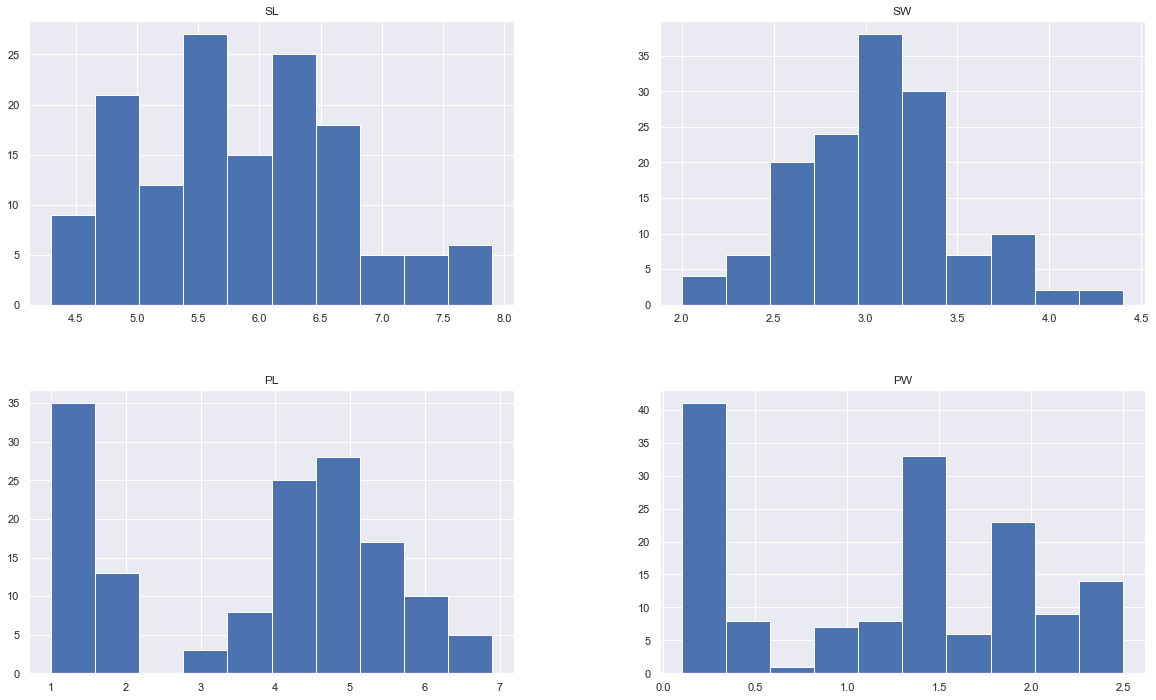

In [246]:
#plotting the entire float values in Histogram
freqgraph= data.select_dtypes(include=["float"])
freqgraph.hist(figsize=(20,12))
plt.show

# 2. Do necessary pre-processing steps.

In [247]:
#printing columns for easly accessing the names of columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [248]:
#fixing the missing values by using Median function
data["SL"]=data["SL"].fillna(data["SL"].median())

In [249]:
#Checking the data nulls after filling 
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [250]:
#applying the median function in a For loop
for i in ['SW','PL']:
    data[i]=data[i].fillna(data[i].median())
    

In [251]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'boxplot of SL')

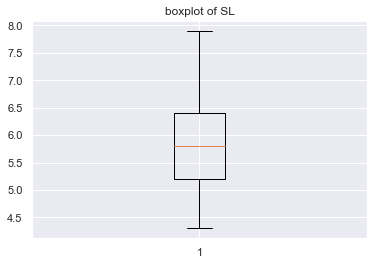

In [252]:
#We've to find out the outliers in the data's
#we're plotting every float values for confirming Outliers
#plotting the "SL" columns
plt.boxplot(data["SL"])
plt.title("boxplot of SL")

Text(0.5, 1.0, 'boxplot of SW')

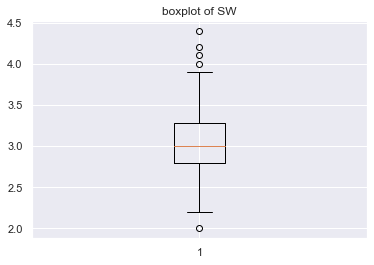

In [253]:
#plotting the "SW" columns
plt.boxplot(data["SW"])
plt.title("boxplot of SW")

From the "SW" Box plot we can say that there are few outliers existing. so we've to fix it.

Text(0.5, 1.0, 'boxplot of PL')

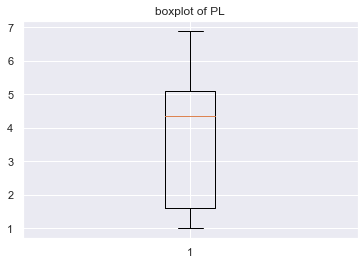

In [254]:
#plotting the "PL" columns
plt.boxplot(data["PL"])
plt.title("boxplot of PL")

Text(0.5, 1.0, 'boxplot of PW')

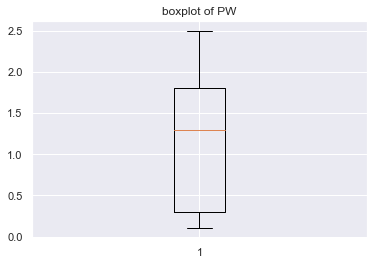

In [255]:
#plotting the "PW" columns
plt.boxplot(data["PW"])
plt.title("boxplot of PW")

#from the all box plots we identified that "SW" had only outliers. so we've to find and drop the outlier for better modelling

C:\Users\The.Maqtron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


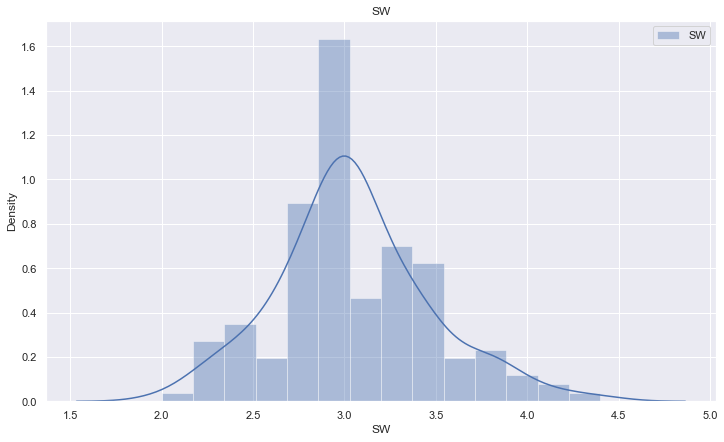

In [257]:
# Plot histogram in proper format
plt.figure(figsize=(12,7)) # figure ration 12:7
sns.set() # for style
 
sns.distplot(data["SW"],label="SW")
 
plt.title("SW") # for histogram title
plt.legend() # for label

In [258]:
# Calculate quartile values for 'SW' using 25 , 50 and 75 percentile values
Q1=np.percentile(data["SW"],25,interpolation= "midpoint")
Q2=np.percentile(data["SW"],50,interpolation= "midpoint")
Q3=np.percentile(data["SW"],75,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)

value of Q1: 2.8
value of Q2: 3.0
value of Q3: 3.25


In [259]:
data["SW"].median()

3.0

In [260]:
IQR= Q3-Q1

In [261]:
# Find IQR, Low limit and higher limit values for 'SW'
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 3.9250000000000003
Lower limit value is: 2.1249999999999996


In [262]:
# Find all outlier values for 'SW'
outlier=[]
for x in data["SW"]:
    if((x>Upper_lim)or(x<Lower_lim)):
        outlier.append(x)

In [263]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

The outliers of "SW" are 4.0, 4.4 , 4.1 , 4.2 and 2.0 and must be dropped

In [264]:
# Let's find out which are the higher outlier SW indexes
ind_val=data["SW"]>Upper_lim
data.loc[ind_val].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [265]:
# Drop the indexes having outlier values for 'SW' 
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'boxplot of SW')

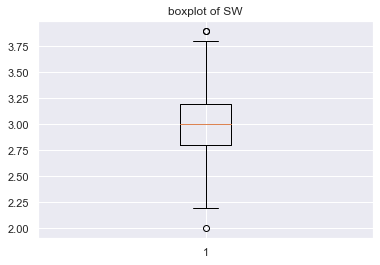

In [266]:
#plot the "SW" after dropped the outliers.
plt.boxplot(data["SW"])
plt.title("boxplot of SW")

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

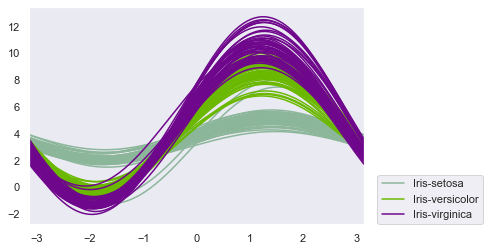

In [267]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(data.drop("SW", axis=1), "Classification")
plt.legend(loc=(1.04,0),title="",prop={'size': 11})

In [268]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [280]:
# Seperating the data into dependent and independent variables
X = data.drop('Classification',axis=1)
y = data['Classification']
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training the models
1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Random Forest

# 1.Logistic Regression

In [281]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
accuracy is 0.9333333333333333


C:\Users\The.Maqtron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.  K – Nearest Neighbour (KNN)

In [282]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
accuracy is 1.0


# 3.Support Vector Machine (SVM)

In [283]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
accuracy is 0.9666666666666667


# 4.Decision Trees

In [284]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
accuracy is 0.9333333333333333


# Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


# Summary:


In this project, we trained our own supervised machine learning model using Iris Flower Classification Project with Machine Learning. 


After the implementing the Linear regression, K – Nearest Neighbour (KNN) , Support Vector Machine (SVM),decision tree and Random forest algorithms from all, The K – Nearest Neighbour (KNN) came outwith the best accuracy of prediction (Accuracy: 1.0) so we can use that model for best predictions.
         
Thank you :)


submitted by HARIKRISHNAN BHUVANENDRAN